In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/raw/uk-war.csv", names=["date","time","location","lat","lon","kind","description","link"])
df.dropna(axis=0,how='any',subset=['lat','lon'],inplace=True)
# Variable with the Longitude and Latitude
X=df.loc[:,['kind','lat','lon']]
X = X[X["kind"].str.contains("Ua") == False]
X["party"]=0
Y=df.loc[:,['kind','lat','lon']]
Y = Y[Y["kind"].str.contains("Ru") == False]
Y = Y[Y["kind"].str.contains("RU") == False]
Y["party"] = 1

In [6]:
frames = [X, Y]
Z = pd.concat(frames)
Z


,kind,lat,lon,party
1,Ru Position,47.739985,37.242889,0
2,BARS-4 still in Kherson,46.687000,33.124000,0
3,Ru Position,48.576680,38.034390,0
4,Ru Position x 2,47.751306,37.235094,0
7,Ru Position and presence adjust,48.090561,37.738456,0
...,...,...,...,...
144,Ua Position,47.425501,33.602895,1
150,Ua Position,48.952260,38.199228,1
153,Ua Position,46.912972,33.447995,1
157,Ua Position and presence adjust,48.606047,38.018398,1


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(Z[Z.columns[1:3]])

# Scale both X_train and X_test
Z_scaled = scaler.transform(Z[Z.columns[1:3]])


scaled_df = pd.DataFrame(Z_scaled, columns=["lat","lon"])

scaled_df


,lat,lon
0,-1.083273,-0.089521
1,-2.521973,-2.321930
2,0.059910,0.339467
3,-1.067805,-0.093745
4,-0.604278,0.179073
...,...,...
159,-1.512954,-2.062372
160,0.573067,0.428808
161,-2.213226,-2.146327
162,0.100034,0.330800


In [38]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 3, metric = 'minkowski', p = 2)
regressor.fit(scaled_df, Z.party)

KNeighborsRegressor(n_neighbors=3)

In [32]:
y_pred = regressor.predict(scaled_df)
y_pred

array([0. , 0.6, 0. , 0. , 0.4, 0. , 0. , 0.2, 0.2, 0. , 0.2, 0.6, 0.6,
       0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0.4, 0.2, 0.8, 0.2, 0.2, 0.6,
       0.2, 0.4, 0. , 0.2, 0. , 0. , 0.2, 0.4, 0.2, 0.4, 0.6, 0.2, 0.2,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.4, 0.4, 0.4,
       0.4, 0.2, 0.4, 0.2, 0.6, 0.4, 0. , 0.4, 0.4, 0. , 0.4, 0.2, 0.4,
       0.2, 0.4, 0.4, 0.4, 0. , 0.2, 0.4, 0. , 0.2, 0. , 0.8, 0. , 0.2,
       0.2, 0.2, 0.2, 0.4, 0.4, 0. , 0. , 0.6, 0. , 0.6, 0. , 0.4, 0.2,
       0. , 0.4, 0.4, 0.4, 0.2, 0.2, 0.4, 0.4, 0.4, 0.8, 0. , 0.4, 0.6,
       0.2, 0.4, 0.4, 0.6, 0.6, 0.6, 0.8, 0.2, 0.4, 0.4, 0.6, 0.4, 0.6,
       0.4, 0.6, 0.2, 0.2, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6, 0.2, 0.4,
       0.6, 0.2, 0.6, 0.4, 0.6, 0.4, 0.2, 0.6, 0.4, 0.2, 0.8, 0.6, 0.6,
       0.4, 0.8, 0.6, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.4, 0.6, 0.4, 0.8,
       0.8, 0.6, 0.8, 0.8, 0.8, 0.8, 0.4, 0.4])

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


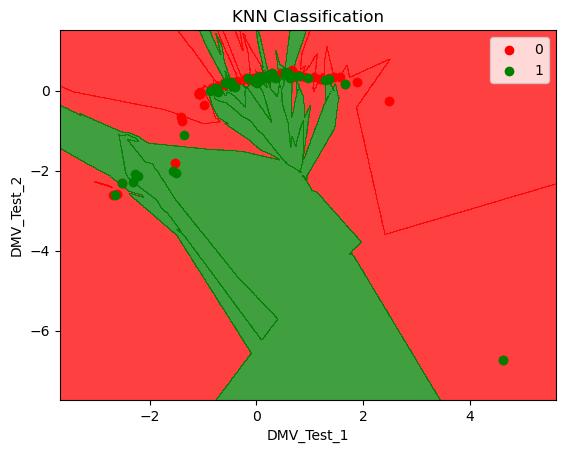

In [39]:
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = Z_scaled, Z.party
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification')
plt.xlabel('DMV_Test_1')
plt.ylabel('DMV_Test_2')
plt.legend()
plt.show()

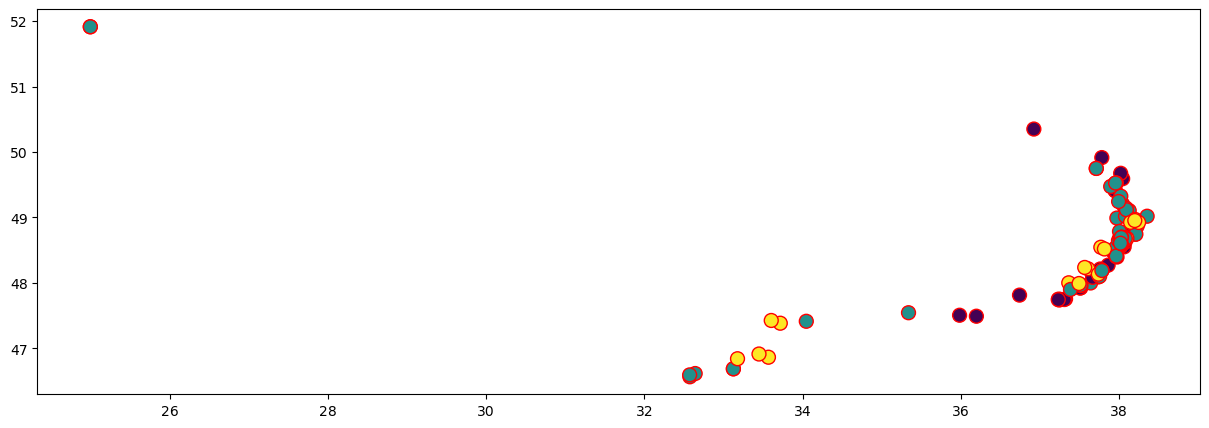

In [10]:
plt.figure(figsize = (15,5))
plt.scatter(Z.lon, Z.lat, c=y_pred, marker= 'o', s=100,edgecolors='red')

In [15]:
Z.lat.min()

46.565222

In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices






array([[  0,  76],
       [  1,  93],
       [  2,  63],
       [  3,  76],
       [  4,  57],
       [  5,  88],
       [  6,  84],
       [  7,  34],
       [  8,  16],
       [  9,  88],
       [ 10,  15],
       [ 11,  33],
       [ 12,  36],
       [ 13,  20],
       [ 14,  38],
       [ 15,  10],
       [ 16,   8],
       [ 17,   2],
       [ 18,  65],
       [ 19,  31],
       [ 20,  93],
       [ 21,  24],
       [ 22,   1],
       [ 23,  65],
       [ 24,  29],
       [ 25,  40],
       [ 26,  80],
       [ 27,  81],
       [ 30,  28],
       [ 29,  24],
       [ 30,  28],
       [ 31,  19],
       [ 32, 101],
       [ 33,  99],
       [ 34,   7],
       [ 35,  44],
       [ 36,  62],
       [ 37,  53],
       [ 38,  14],
       [ 39,  68],
       [ 40,  82],
       [ 41,  98],
       [ 42,  50],
       [ 43,  85],
       [ 44,  40],
       [ 45,  68],
       [ 46,  52],
       [ 47,  70],
       [ 48,  53],
       [ 49,  85],
       [ 50,  42],
       [ 51,  89],
       [ 52,